<a href="https://colab.research.google.com/github/simrann0104/Addiction-Risk-Prediction-Using-Python/blob/main/Addiction_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA CLEANING AND ENCODING

IMPORTING DATA SET

In [ ]:
from google.colab import files

# Upload file manually
uploaded = files.upload()


Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
import os

# List all files in content folder
print(os.listdir("/content/"))


['.config', 'Dataset.xlsx', 'sample_data']


In [ ]:
import pandas as pd

file_path = "/content/Dataset.xlsx"  # Change if filename is different

# Load the dataset
df = pd.read_excel(file_path, sheet_name="Form Responses 1")

# Show first few rows
df.head()


,Timestamp,Name,Age,Which substances have you used or are currently using?,How often do you consume any of the substances listed above?,0,Do you experience cravings or withdrawal symptoms when you stop using these substances?,Do you engage in any of the following behaviors? (Select all that apply),Do you use substances or engage in behaviors to cope with stress or emotional challenges?,Have you been diagnosed with any of the following mental health conditions?,How often do you feel overwhelmed or stressed in your daily life?,"Do you have access to a support system (family, friends, professional help)?",Email Address
0,2025-02-18 12:43:02.489,Aarav,21,Alcohol,Weekly,18,No,NaN,Sometimes,NaN,Rarely,No,NaN
1,2025-02-18 13:08:05.907,Rahul,20,Alcohol,Rarely,18,No,Social Media Use,No,NaN,Often,Yes,NaN
2,2025-02-18 18:03:33.554,Prachi,21,NaN,Never,0,No,Shopping Addiction,No,Anxiety,Often,No,NaN
3,2025-02-18 18:06:16.002,Swati,21,NaN,Monthly,20,No,Social Media Use,No,OCD,Rarely,No,NaN
4,2025-02-18 18:11:41.388,Sansy,20,"Prescription drugs (e.g., opioids, painkillers)",Daily,18,No,"Social Media Use, Shopping Addiction",No,Anxiety,Often,Yes,NaN


Handling Missing Values

1. Drop Email address column

In [ ]:
df.drop(columns=["Email Address"], inplace=True)

Check for missing/null values

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

# Check if there are any missing values in the entire dataset
print("Total Missing Values:", df.isnull().sum().sum())

Timestamp                                                                                        0
Name                                                                                             0
Age                                                                                              0
Which substances have you used or are currently using?                                         139
How often do you consume any of the substances listed above?                                     1
0                                                                                                0
Do you experience cravings or withdrawal symptoms when you stop using these substances?          0
Do you engage in any of the following behaviors? (Select all that apply)                        69
Do you use substances or engage in behaviors to cope with stress or emotional challenges?        0
Have you been diagnosed with any of the following mental health conditions?                    127
How often 

Renaming columns for readability

In [ ]:
# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Now rename
df.rename(columns={
    "Timestamp": "timestamp",
    "Name": "name",
    "Age": "age",
    "Which substances have you used or are currently using?": "substances_used",
    "How often do you consume any of the substances listed above?": "substance_freq",
    "At what age did you first use any of the substances listed above? (If None enter 0)": "first_use_age",
    "Do you experience cravings or withdrawal symptoms when you stop using these substances?": "withdrawal_symptoms",
    "Do you engage in any of the following behaviors? (Select all that apply)": "risky_behaviors",
    "Do you use substances or engage in behaviors to cope with stress or emotional challenges?": "coping_mechanism",
    "Have you been diagnosed with any of the following mental health conditions?": "mental_health_diagnosis",
    "How often do you feel overwhelmed or stressed in your daily life?": "stress_level",
    "Do you have access to a support system (family, friends, professional help)?": "support_system"
}, inplace=True)


Fill Missing values

In [ ]:
df.fillna({"substances_used": "none"}, inplace=True)
df.fillna({"substance_freq": "none"}, inplace=True)
df.fillna({"risky_behaviors": "none"}, inplace=True)
df.fillna({"mental_health_diagnosis": "none"}, inplace=True)


In [ ]:
df.loc[df['substances_used'] == 'none', 'substance_freq'] = 'never'

In [ ]:
df.isnull().sum()

,0
timestamp,0
name,0
age,0
substances_used,0
substance_freq,0
0,0
withdrawal_symptoms,0
risky_behaviors,0
coping_mechanism,0
mental_health_diagnosis,0


Standardizing Text Responses

In [ ]:
# Function to clean text
def clean_text(text):
    if isinstance(text, str):  # Only process text columns
        return text.strip().lower()  # Remove spaces & convert to lowercase
    return text

# Apply function to all text columns
df = df.applymap(clean_text)

# Show first few rows to verify
df.head()

<ipython-input-11-b6506631642c>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_text)


,timestamp,name,age,substances_used,substance_freq,0,withdrawal_symptoms,risky_behaviors,coping_mechanism,mental_health_diagnosis,stress_level,support_system
0,2025-02-18 12:43:02.489,aarav,21,alcohol,weekly,18,no,none,sometimes,none,rarely,no
1,2025-02-18 13:08:05.907,rahul,20,alcohol,rarely,18,no,social media use,no,none,often,yes
2,2025-02-18 18:03:33.554,prachi,21,none,never,0,no,shopping addiction,no,anxiety,often,no
3,2025-02-18 18:06:16.002,swati,21,none,never,20,no,social media use,no,ocd,rarely,no
4,2025-02-18 18:11:41.388,sansy,20,"prescription drugs (e.g., opioids, painkillers)",daily,18,no,"social media use, shopping addiction",no,anxiety,often,yes


Checking for Outliers

In [ ]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower limit
    upper_bound = Q3 + 1.5 * IQR  # Upper limit

    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply to numerical columns
outlier_rows = detect_outliers_iqr(df, "age")  # Change to other numeric columns if needed

# Show detected outliers
outlier_rows


,timestamp,name,age,substances_used,substance_freq,0,withdrawal_symptoms,risky_behaviors,coping_mechanism,mental_health_diagnosis,stress_level,support_system
91,2025-02-24 20:22:41.422,manveer,68,"prescription drugs (e.g., opioids, painkillers)",weekly,45,yes,social media use,sometimes,ocd,never,no


Visualizing Outliers

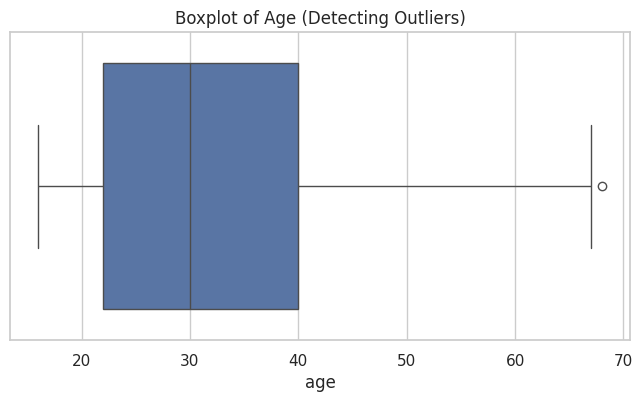

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for age
plt.figure(figsize=(8,4))
sns.boxplot(x=df["age"])
plt.title("Boxplot of Age (Detecting Outliers)")
plt.show()


Encoding the Dataset

Ordinal Data Encoding

In [ ]:
ordinal_mapping = {
    'substance_freq': {'never': 1, 'rarely': 2, 'monthly': 3, 'weekly': 4, 'daily': 5},
    'withdrawal_symptoms': {'no': 1, 'sometimes': 2, 'yes': 3},
    'stress_level': {'never': 1, 'rarely': 2, 'sometimes': 3, 'often': 4, 'always': 5},
    'support_system': {'no': 1, 'sometimes': 2, 'yes': 3},
    'coping_mechanism': {'no': 1, 'sometimes': 2, 'yes': 3}
}

df.replace(ordinal_mapping, inplace=True)
df.head()

<ipython-input-14-30f39fe3c435>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(ordinal_mapping, inplace=True)


,timestamp,name,age,substances_used,substance_freq,0,withdrawal_symptoms,risky_behaviors,coping_mechanism,mental_health_diagnosis,stress_level,support_system
0,2025-02-18 12:43:02.489,aarav,21,alcohol,4,18,1,none,2,none,2,1
1,2025-02-18 13:08:05.907,rahul,20,alcohol,2,18,1,social media use,1,none,4,3
2,2025-02-18 18:03:33.554,prachi,21,none,1,0,1,shopping addiction,1,anxiety,4,1
3,2025-02-18 18:06:16.002,swati,21,none,1,20,1,social media use,1,ocd,2,1
4,2025-02-18 18:11:41.388,sansy,20,"prescription drugs (e.g., opioids, painkillers)",5,18,1,"social media use, shopping addiction",1,anxiety,4,3


Encoding of Substances used

In [ ]:
# Define the mapping dictionary
substance_mapping = {
    'alcohol': 1,
    'tobacco': 2,
    'prescription drugs (e.g., opioids, painkillers)': 3,
    'cannabis': 4,
    'recreational drugs (e.g., cocaine, heroin)': 5,
    'none': 6,
    'others': 7
}

# Encode the 'substances_used' column in-place
df['substances_used'] = df['substances_used'].replace(substance_mapping)

# Display the first few rows to check
print(df.head())


                timestamp    name  age  substances_used  substance_freq   0  \
0 2025-02-18 12:43:02.489   aarav   21                1               4  18   
1 2025-02-18 13:08:05.907   rahul   20                1               2  18   
2 2025-02-18 18:03:33.554  prachi   21                6               1   0   
3 2025-02-18 18:06:16.002   swati   21                6               1  20   
4 2025-02-18 18:11:41.388   sansy   20                3               5  18   

   withdrawal_symptoms                       risky_behaviors  \
0                    1                                  none   
1                    1                      social media use   
2                    1                    shopping addiction   
3                    1                      social media use   
4                    1  social media use, shopping addiction   

   coping_mechanism mental_health_diagnosis  stress_level  support_system  
0                 2                    none             2       

<ipython-input-15-6a0fcea8ca09>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['substances_used'] = df['substances_used'].replace(substance_mapping)


In [ ]:
df.head(50)

,timestamp,name,age,substances_used,substance_freq,0,withdrawal_symptoms,risky_behaviors,coping_mechanism,mental_health_diagnosis,stress_level,support_system
0,2025-02-18 12:43:02.489,aarav,21,1,4,18,1,none,2,none,2,1
1,2025-02-18 13:08:05.907,rahul,20,1,2,18,1,social media use,1,none,4,3
2,2025-02-18 18:03:33.554,prachi,21,6,1,0,1,shopping addiction,1,anxiety,4,1
3,2025-02-18 18:06:16.002,swati,21,6,1,20,1,social media use,1,ocd,2,1
4,2025-02-18 18:11:41.388,sansy,20,3,5,18,1,"social media use, shopping addiction",1,anxiety,4,3
5,2025-02-18 18:14:16.742,parbindar singh,18,6,1,0,1,video gaming,1,none,1,2
6,2025-02-18 19:42:24.794,sneha prasad,20,6,1,0,1,none,1,none,1,3
7,2025-02-18 21:08:27.651,anonymous,22,6,1,21,1,social media use,1,none,2,3
8,2025-02-18 21:40:44.805,simran,21,6,1,0,1,"social media use, food addiction",1,anxiety,4,3
9,2025-02-18 21:46:39.244,rahul,21,1,3,17,2,"video gaming, social media use",3,anxiety,5,3


Mental Health Encoding

In [ ]:
mental_health_mapping = {
    'depression': 1,
    'anxiety': 2,
    'bipolar disorder': 3,
    'ocd': 4,
    'ptsd': 5,
    'none': 6
}

df['mental_health_diagnosis'] = df['mental_health_diagnosis'].apply(lambda x: mental_health_mapping.get(x.lower(), 6) if pd.notna(x) else 6)


In [ ]:
df.head(10)

,timestamp,name,age,substances_used,substance_freq,0,withdrawal_symptoms,risky_behaviors,coping_mechanism,mental_health_diagnosis,stress_level,support_system
0,2025-02-18 12:43:02.489,aarav,21,1,4,18,1,none,2,6,2,1
1,2025-02-18 13:08:05.907,rahul,20,1,2,18,1,social media use,1,6,4,3
2,2025-02-18 18:03:33.554,prachi,21,6,1,0,1,shopping addiction,1,2,4,1
3,2025-02-18 18:06:16.002,swati,21,6,1,20,1,social media use,1,4,2,1
4,2025-02-18 18:11:41.388,sansy,20,3,5,18,1,"social media use, shopping addiction",1,2,4,3
5,2025-02-18 18:14:16.742,parbindar singh,18,6,1,0,1,video gaming,1,6,1,2
6,2025-02-18 19:42:24.794,sneha prasad,20,6,1,0,1,none,1,6,1,3
7,2025-02-18 21:08:27.651,anonymous,22,6,1,21,1,social media use,1,6,2,3
8,2025-02-18 21:40:44.805,simran,21,6,1,0,1,"social media use, food addiction",1,2,4,3
9,2025-02-18 21:46:39.244,rahul,21,1,3,17,2,"video gaming, social media use",3,2,5,3


Multiple Checkboxes Encoding

In [ ]:
# First, replace NaNs with an empty string to avoid errors
df['risky_behaviors'] = df['risky_behaviors'].fillna('')

# Define all possible risky behaviors
risky_options = ['gambling', 'video gaming', 'social media use', 'food addiction', 'shopping addiction', 'none']

# Create binary columns for each risky behavior
for option in risky_options:
    df[f"risky_{option.replace(' ', '_')}"] = df['risky_behaviors'].apply(lambda x: 1 if option in x.split(', ') else 0)

# Drop the original `risky_behaviors` column since it's now encoded
df.drop(columns=['risky_behaviors'], inplace=True)


In [ ]:
df.head(10)

,timestamp,name,age,substances_used,substance_freq,0,withdrawal_symptoms,coping_mechanism,mental_health_diagnosis,stress_level,support_system,risky_gambling,risky_video_gaming,risky_social_media_use,risky_food_addiction,risky_shopping_addiction,risky_none
0,2025-02-18 12:43:02.489,aarav,21,1,4,18,1,2,6,2,1,0,0,0,0,0,1
1,2025-02-18 13:08:05.907,rahul,20,1,2,18,1,1,6,4,3,0,0,1,0,0,0
2,2025-02-18 18:03:33.554,prachi,21,6,1,0,1,1,2,4,1,0,0,0,0,1,0
3,2025-02-18 18:06:16.002,swati,21,6,1,20,1,1,4,2,1,0,0,1,0,0,0
4,2025-02-18 18:11:41.388,sansy,20,3,5,18,1,1,2,4,3,0,0,1,0,1,0
5,2025-02-18 18:14:16.742,parbindar singh,18,6,1,0,1,1,6,1,2,0,1,0,0,0,0
6,2025-02-18 19:42:24.794,sneha prasad,20,6,1,0,1,1,6,1,3,0,0,0,0,0,1
7,2025-02-18 21:08:27.651,anonymous,22,6,1,21,1,1,6,2,3,0,0,1,0,0,0
8,2025-02-18 21:40:44.805,simran,21,6,1,0,1,1,2,4,3,0,0,1,1,0,0
9,2025-02-18 21:46:39.244,rahul,21,1,3,17,2,3,2,5,3,0,1,1,0,0,0


Min Max Scaling/Normalization for preprocessing of age and first_use_age

In [ ]:
df.rename(columns={
    "0": "first_use_age"
}, inplace=True)


In [ ]:
df.head()

,timestamp,name,age,substances_used,substance_freq,first_use_age,withdrawal_symptoms,coping_mechanism,mental_health_diagnosis,stress_level,support_system,risky_gambling,risky_video_gaming,risky_social_media_use,risky_food_addiction,risky_shopping_addiction,risky_none
0,2025-02-18 12:43:02.489,aarav,21,1,4,18,1,2,6,2,1,0,0,0,0,0,1
1,2025-02-18 13:08:05.907,rahul,20,1,2,18,1,1,6,4,3,0,0,1,0,0,0
2,2025-02-18 18:03:33.554,prachi,21,6,1,0,1,1,2,4,1,0,0,0,0,1,0
3,2025-02-18 18:06:16.002,swati,21,6,1,20,1,1,4,2,1,0,0,1,0,0,0
4,2025-02-18 18:11:41.388,sansy,20,3,5,18,1,1,2,4,3,0,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Clean column names
df.columns = df.columns.str.strip()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling on numerical columns
df['age_scaled'] = scaler.fit_transform(df[['age']])
df['first_use_age_scaled'] = scaler.fit_transform(df[['first_use_age']])


Saving encoded file

In [ ]:
from google.colab import files

# Save DataFrame as an Excel file
file_path = "Cleaned_Dataset_Encoded.xlsx"
df.to_excel(file_path, index=False)

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



# EDA - EXPLORATORY DATA ANALYSIS

IMPORTING DATASET

In [ ]:
from google.colab import files

# Upload file manually
uploaded = files.upload()


Saving Cleaned_Dataset_Encoded.xlsx to Cleaned_Dataset_Encoded (1).xlsx


In [ ]:
import os

# List all files in content folder
print(os.listdir("/content/"))


['.config', 'Dataset.xlsx', 'Cleaned_Dataset_Encoded.xlsx', 'Cleaned_Dataset_Encoded (1).xlsx', 'sample_data']


In [ ]:
import pandas as pd

file_path = "/content/Cleaned_Dataset_Encoded.xlsx"  # Change if filename is different

# Load the dataset
df = pd.read_excel(file_path)

# Show first few rows
df.head()


,timestamp,name,age,substances_used,substance_freq,first_use_age,withdrawal_symptoms,coping_mechanism,mental_health_diagnosis,stress_level,support_system,risky_gambling,risky_video_gaming,risky_social_media_use,risky_food_addiction,risky_shopping_addiction,risky_none,age_scaled,first_use_age_scaled
0,2025-02-18 12:43:02.489,aarav,21,1,4,18,1,2,6,2,1,0,0,0,0,0,1,0.096154,0.327273
1,2025-02-18 13:08:05.907,rahul,20,1,2,18,1,1,6,4,3,0,0,1,0,0,0,0.076923,0.327273
2,2025-02-18 18:03:33.554,prachi,21,6,1,0,1,1,2,4,1,0,0,0,0,1,0,0.096154,0.000000
3,2025-02-18 18:06:16.002,swati,21,6,1,20,1,1,4,2,1,0,0,1,0,0,0,0.096154,0.363636
4,2025-02-18 18:11:41.388,sansy,20,3,5,18,1,1,2,4,3,0,0,1,0,1,0,0.076923,0.327273


EDA

### **Encodings Used in Your Dataset**  

#### **1. Ordinal Encodings** (Ordered categories mapped to numerical values)  
- **Substance Frequency (`substance_freq`)**  
  - `never: 1`, `rarely: 2`, `monthly: 3`, `weekly: 4`, `daily: 5`  
- **Withdrawal Symptoms (`withdrawal_symptoms`)**  
  - `no: 1`, `sometimes: 2`, `yes: 3`  
- **Stress Level (`stress_level`)**  
  - `never: 1`, `rarely: 2`, `sometimes: 3`, `often: 4`, `always: 5`  
- **Support System (`support_system`)**  
  - `no: 1`, `sometimes: 2`, `yes: 3`  
- **Coping Mechanism (`coping_mechanism`)**  
  - `no: 1`, `sometimes: 2`, `yes: 3`  

#### **2. Substance Use Encoding**  
- **`substances_used` column mapped to numerical values**  
  - `alcohol: 1`, `tobacco: 2`, `prescription drugs (opioids, painkillers): 3`  
  - `cannabis: 4`, `recreational drugs (cocaine, heroin): 5`, `none: 6`, `others: 7`  

#### **3. Mental Health Diagnosis Encoding**  
- **Converted to lowercase and mapped as follows:**  
  - `depression: 1`, `anxiety: 2`, `bipolar disorder: 3`, `OCD: 4`, `PTSD: 5`, `none: 6`  

#### **4. Risky Behaviors Encoded as Binary (One-Hot Encoding)**  
- **Created new columns from `risky_behaviors` and assigned `0` or `1`:**  
  - `risky_gambling`, `risky_video_gaming`, `risky_social_media_use`, `risky_food_addiction`, `risky_shopping_addiction`, `risky_none`  
  - `1` means the behavior is present, `0` means absent.  

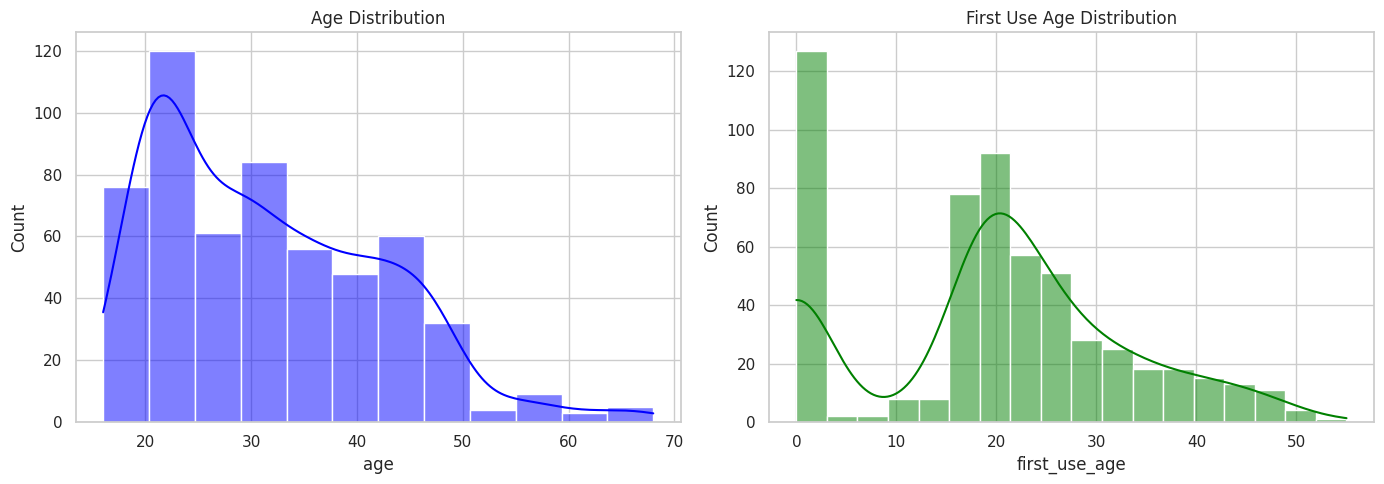

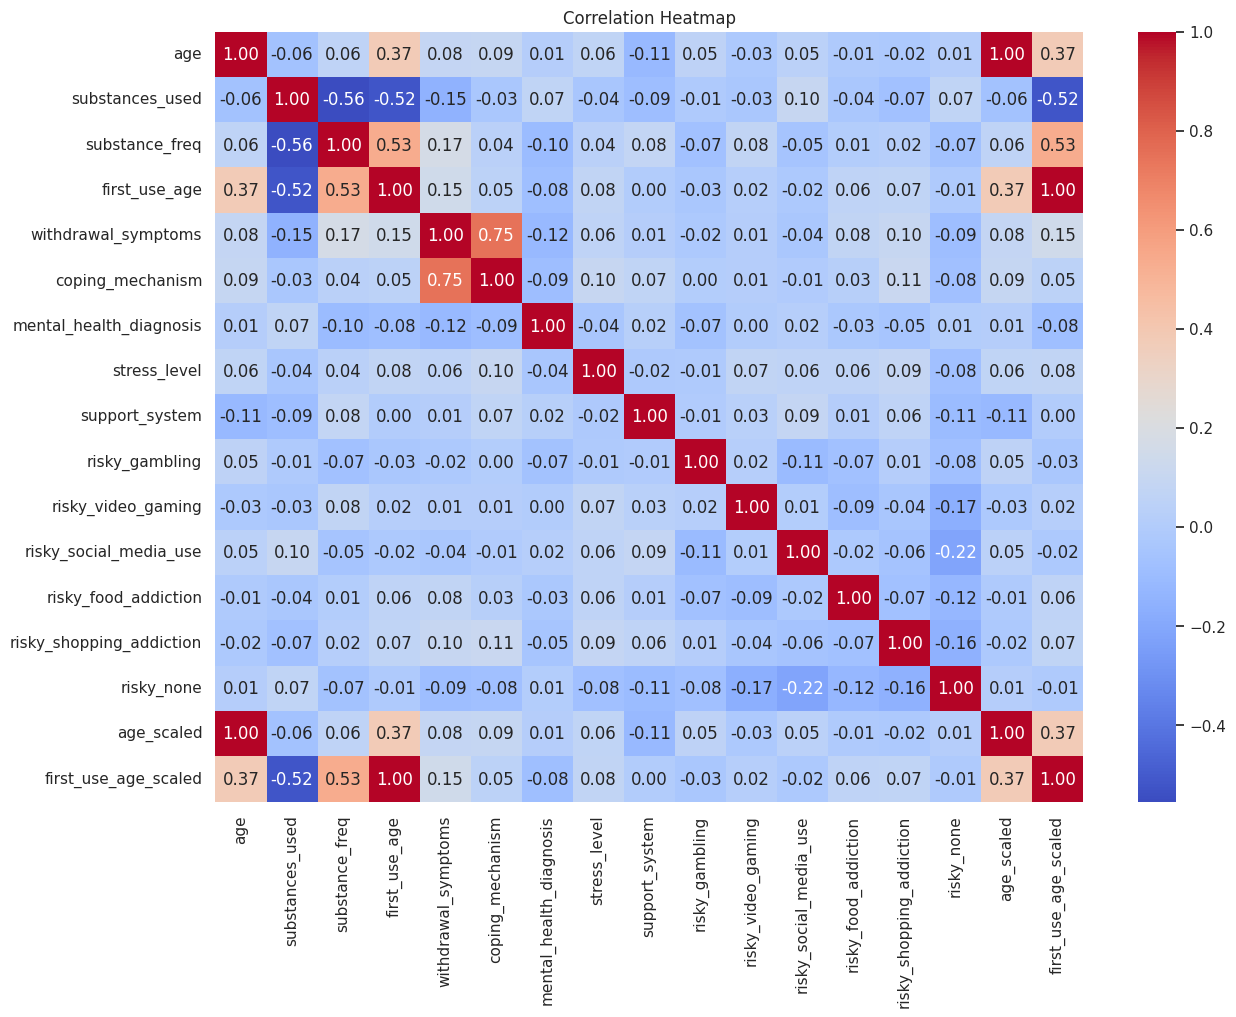

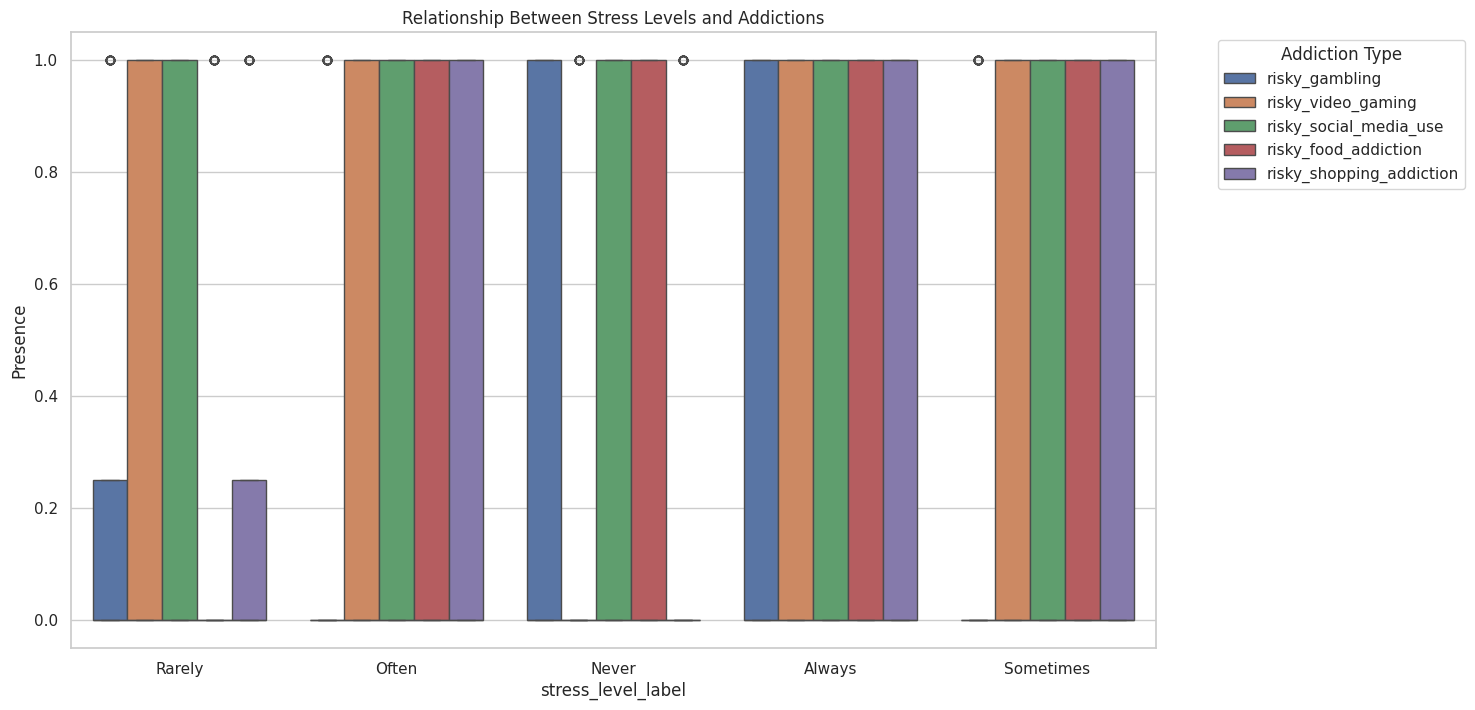

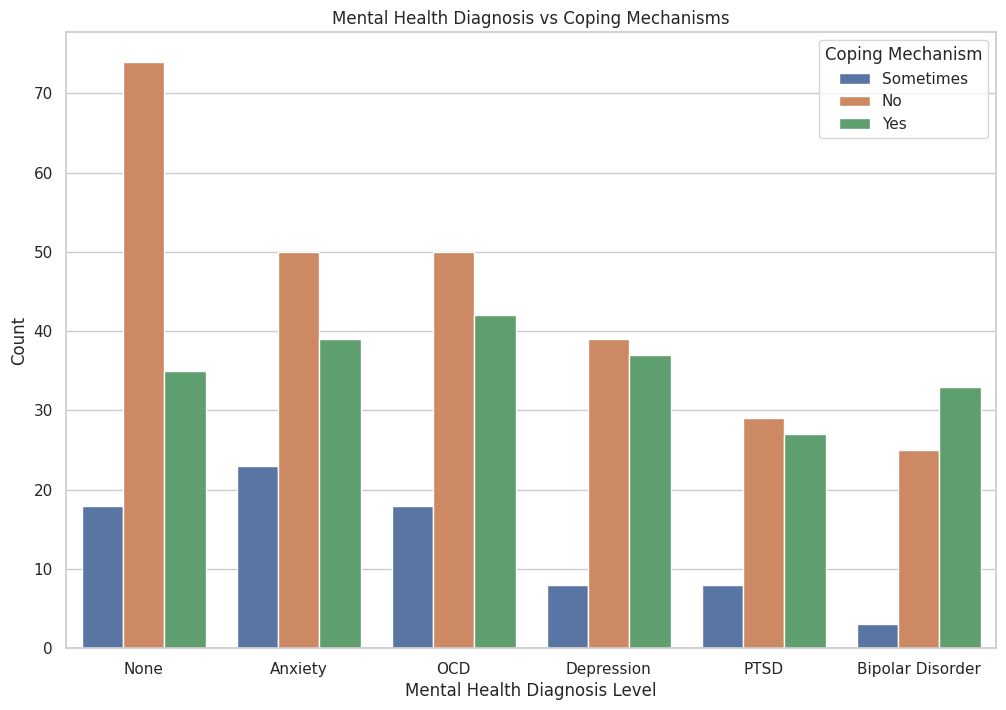

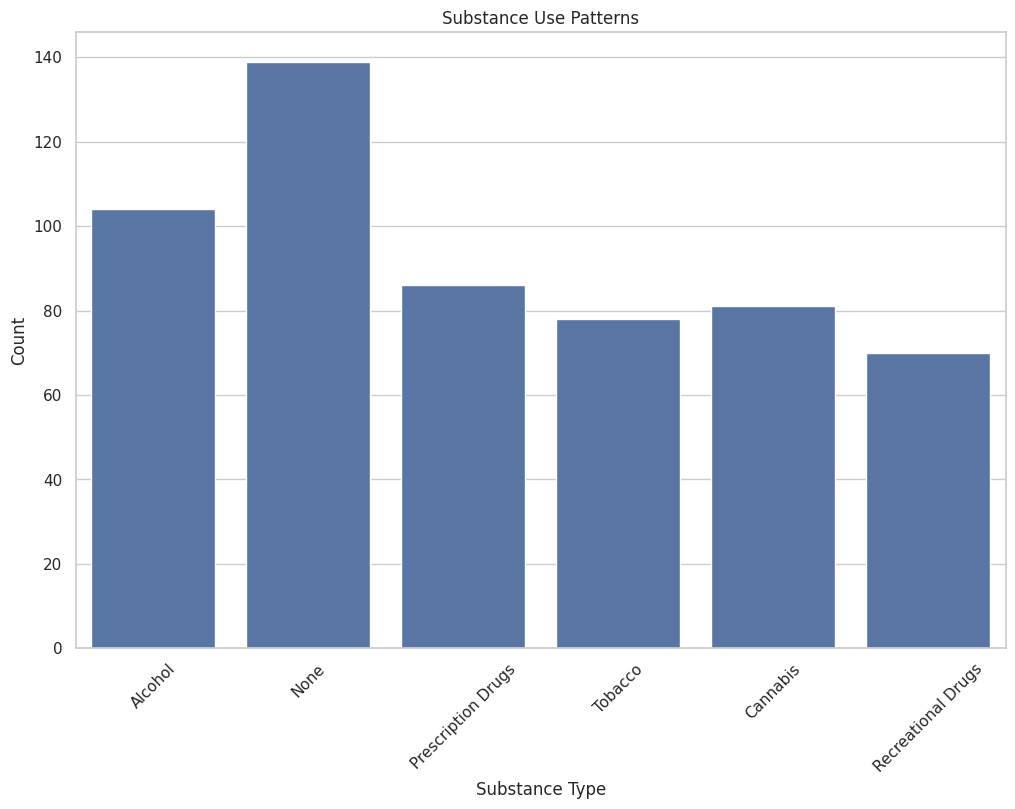

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Define mappings for legends
stress_mapping = {1: 'Never', 2: 'Rarely', 3: 'Sometimes', 4: 'Often', 5: 'Always'}
support_mapping = {1: 'No', 2: 'Sometimes', 3: 'Yes'}
coping_mapping = {1: 'No', 2: 'Sometimes', 3: 'Yes'}
mental_health_mapping = {1: 'Depression', 2: 'Anxiety', 3: 'Bipolar Disorder', 4: 'OCD', 5: 'PTSD', 6: 'None'}
substance_mapping = {1: 'Alcohol', 2: 'Tobacco', 3: 'Prescription Drugs', 4: 'Cannabis', 5: 'Recreational Drugs', 6: 'None', 7: 'Others'}

# 1. Age and First Use Age Distributions
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['age'], kde=True, ax=axs[0], color='blue')
axs[0].set_title('Age Distribution')
sns.histplot(df['first_use_age'], kde=True, ax=axs[1], color='green')
axs[1].set_title('First Use Age Distribution')
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3. Relationship Between Stress Levels and Addictions
plt.figure(figsize=(14, 8))
df['stress_level_label'] = df['stress_level'].map(stress_mapping)
stress_addiction_cols = ['stress_level_label', 'risky_gambling', 'risky_video_gaming', 'risky_social_media_use', 'risky_food_addiction', 'risky_shopping_addiction']
df_melted = df.melt(id_vars='stress_level_label', value_vars=stress_addiction_cols[1:], var_name='Addiction Type', value_name='Presence')
sns.boxplot(x='stress_level_label', y='Presence', hue='Addiction Type', data=df_melted)
plt.title('Relationship Between Stress Levels and Addictions')
plt.legend(title='Addiction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Mental Health Diagnosis vs. Coping Mechanisms
plt.figure(figsize=(12, 8))
df['coping_mechanism_label'] = df['coping_mechanism'].map(coping_mapping)
df['mental_health_label'] = df['mental_health_diagnosis'].map(mental_health_mapping)
sns.countplot(x='mental_health_label', hue='coping_mechanism_label', data=df)
plt.title('Mental Health Diagnosis vs Coping Mechanisms')
plt.xlabel('Mental Health Diagnosis Level')
plt.ylabel('Count')
plt.legend(title='Coping Mechanism')
plt.show()

# 5. Substance Use Patterns by Age Groups
plt.figure(figsize=(12, 8))
df['substances_used_label'] = df['substances_used'].map(substance_mapping)
sns.countplot(x='substances_used_label', data=df)
plt.title('Substance Use Patterns')
plt.xlabel('Substance Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


---

## **1. Age and First Use Age Distribution (Histograms with KDE Plots)**  
- **Age Distribution**:  
  - Most participants are young, with a peak in the **20-30 years** range.  
  - The dataset is **right-skewed**, meaning fewer older individuals.  
- **First Use Age Distribution**:  
  - **Bimodal distribution** (two peaks) suggests two major age groups of first use.  
  - Early use (around **0**) indicates no consumption.
  - A larger peak around **15-20 years** suggests substance use often begins in adolescence or early adulthood.
---

## **2. Correlation Heatmap**  
- Strong correlations exist between key variables:  
  - **Withdrawal Symptoms and Coping Mechanisms** (**0.74**): Higher withdrawal symptoms lead to greater reliance on coping mechanisms.  
  - **Age and First Use Age** (**0.29**): Older individuals tend to have experienced substance use earlier in life.  
- Negative correlation:  
  - **Support System and Substance Use**: Weak negative correlation (-0.11) shows lack of support might increase substance use.  
- Low correlations with risky behaviors suggest **non-linear relationships**.
---

## **3. Stress Levels and Addictions (Bar Plot)**  
- Higher stress levels (**4 and 5**) strongly correlate with increased risky behaviors like:  
  - **Gambling**  
  - **Video gaming**  
  - **Social media use**  
  - **Food and Shopping Addiction**  
- Lower stress levels (**1 and 2**) show limited addiction presence.  
---

## **4. Mental Health Diagnosis and Coping Mechanisms (Bar Plot)**  
- **Coping Mechanism 1 (e.g., Avoidance)** is frequently used across all diagnosis levels.  
- **Coping Mechanism 2** is underutilized, suggesting ineffective or unavailable support.  
- **Coping Mechanism 3 (e.g., Therapy)** increases with severe diagnoses, indicating reliance on professional intervention.  
---

## **5. Substance Use Across Age Groups (Box Plot)**  
- **Young Adults (15-24 years)**: Highest substance use with a wide range of polysubstance users.  
- **Middle Age (25-54 years)**: Moderate use with reduced extreme cases.  
- **Older Adults (65+ years)**: Lowest substance use, possibly due to health concerns or lifestyle changes.  
- Outliers in young adults suggest **high-risk behaviors**.  
---

# Feature Engineering/ Feature Selection & Sampling

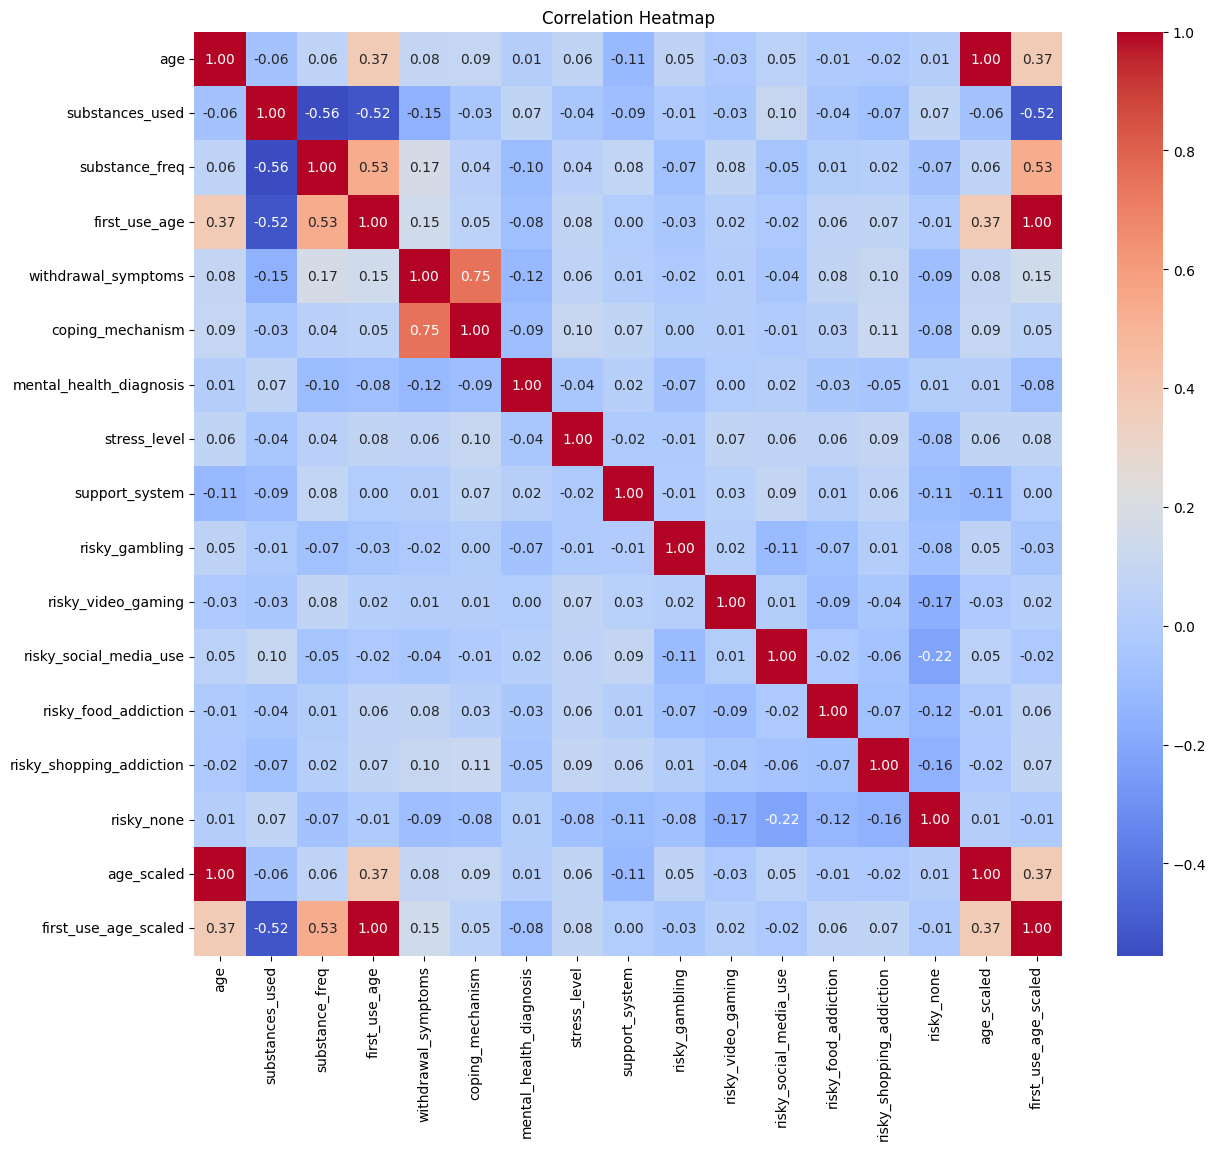

Highly correlated features to drop: {'first_use_age_scaled', 'age_scaled'}
✅ Feature engineering and selection completed. Final dataset saved to Final_Feature_Engineered_Dataset.xlsx


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Step 1: Correlation Analysis (Using Only Numeric Columns) ###
# Select only numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Ensure all numeric columns are truly numeric
for col in numeric_data.columns:
    numeric_data[col] = pd.to_numeric(numeric_data[col], errors='coerce')

# Handle missing values, if any
numeric_data = numeric_data.fillna(numeric_data.mean())

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Step 2: Remove Highly Correlated Features ###
# Identify features with correlation > 0.8
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(f"Highly correlated features to drop: {highly_correlated_features}")

# Drop identified features
data_reduced = df.drop(columns=highly_correlated_features)

### Step 3: Feature Scaling ###
# Select numeric features again post-dropping
numerical_features = data_reduced.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler
scaler = StandardScaler()
data_reduced[numerical_features] = scaler.fit_transform(data_reduced[numerical_features])

### Step 4: Feature Engineering ###
# Creating interaction terms
if 'stress_level' in data_reduced.columns and 'support_system' in data_reduced.columns:
    data_reduced['stress_support_interaction'] = data_reduced['stress_level'] * data_reduced['support_system']

if 'age_scaled' in data_reduced.columns and 'substance_freq' in data_reduced.columns:
    data_reduced['age_substance_interaction'] = data_reduced['age_scaled'] * data_reduced['substance_freq']
# Save the transformed dataset to current working directory
output_path = 'Final_Feature_Engineered_Dataset.xlsx'
data_reduced.to_excel(output_path, index=False)

print(f"✅ Feature engineering and selection completed. Final dataset saved to {output_path}")



In [ ]:
df.head()

,timestamp,name,age,substances_used,substance_freq,first_use_age,withdrawal_symptoms,coping_mechanism,mental_health_diagnosis,stress_level,support_system,risky_gambling,risky_video_gaming,risky_social_media_use,risky_food_addiction,risky_shopping_addiction,risky_none,age_scaled,first_use_age_scaled
0,2025-02-18 12:43:02.489,aarav,21,1,4,18,1,2,6,2,1,0,0,0,0,0,1,0.096154,0.327273
1,2025-02-18 13:08:05.907,rahul,20,1,2,18,1,1,6,4,3,0,0,1,0,0,0,0.076923,0.327273
2,2025-02-18 18:03:33.554,prachi,21,6,1,0,1,1,2,4,1,0,0,0,0,1,0,0.096154,0.000000
3,2025-02-18 18:06:16.002,swati,21,6,1,20,1,1,4,2,1,0,0,1,0,0,0,0.096154,0.363636
4,2025-02-18 18:11:41.388,sansy,20,3,5,18,1,1,2,4,3,0,0,1,0,1,0,0.076923,0.327273


Available columns: ['timestamp', 'name', 'age', 'substances_used', 'substance_freq', 'first_use_age', 'withdrawal_symptoms', 'coping_mechanism', 'mental_health_diagnosis', 'stress_level', 'support_system', 'risky_gambling', 'risky_video_gaming', 'risky_social_media_use', 'risky_food_addiction', 'risky_shopping_addiction', 'risky_none', 'age_scaled', 'first_use_age_scaled']
✅ Encoded 'substances_used' into 'substances_used_label'
🧹 Dropped 'timestamp' column to prevent dtype conflict.
ℹ️ No categorical columns to encode.
✅ Random Forest model trained.


<ipython-input-38-75320b601a6c>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


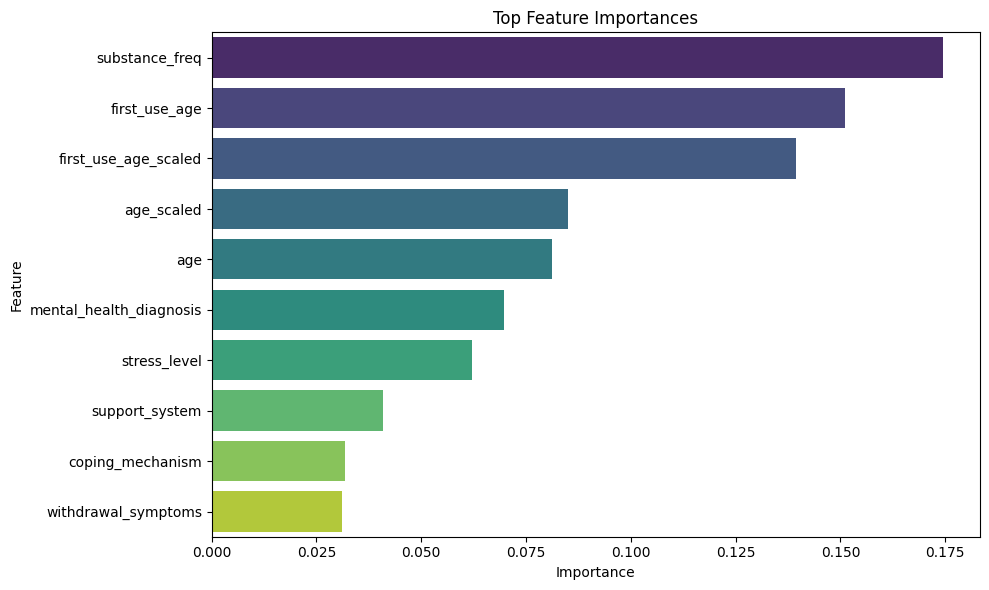

✅ Top 10 features selected and saved to CSV.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
print("Available columns:", df.columns.tolist())

# === STEP 2: Encode the target column ===
if 'substances_used_label' in df.columns:
    target_column = 'substances_used_label'
elif 'substances_used' in df.columns:
    le = LabelEncoder()
    df['substances_used_label'] = le.fit_transform(df['substances_used'])
    target_column = 'substances_used_label'
    print("✅ Encoded 'substances_used' into 'substances_used_label'")
else:
    raise KeyError("❌ Target column not found. Please verify your dataset.")

# === STEP 3: Drop non-feature columns ===
df.drop(columns=['name', 'substances_used'], inplace=True, errors='ignore')

# === STEP 4: Define Features (X) and Target (y) ===
y = df[target_column]
X = df.drop(columns=[target_column])

# === STEP 4.1: Drop 'timestamp' to avoid datetime dtype error ===
if 'timestamp' in X.columns:
    X.drop(columns=['timestamp'], inplace=True)
    print("🧹 Dropped 'timestamp' column to prevent dtype conflict.")

# === STEP 5: One-hot encode categorical variables (if any) ===
categorical_cols = X.select_dtypes(include='object').columns.tolist()
if categorical_cols:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print(f"🎯 One-hot encoded columns: {categorical_cols}")
else:
    print("ℹ️ No categorical columns to encode.")

# === STEP 6: Train Random Forest Classifier ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
print("✅ Random Forest model trained.")

# === STEP 7: Compute and Plot Feature Importances ===
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_n = 10
top_features = feature_importances.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# === STEP 8: Save dataset with top features only ===
X_selected = X[top_features['Feature']]
selected_df = pd.concat([X_selected, y], axis=1)
selected_df.to_csv('selected_features_dataset.csv', index=False)

print(f"✅ Top {top_n} features selected and saved to CSV.")


* The plot highlights that **Substance Frequency, First Use Age, and Age** are the most influential features, followed by **Withdrawal Symptoms, Coping Mechanisms, Mental Health Diagnosis, and Stress Level.**  

* **Support Systems** also play a role, while various **risky behaviors** have moderate importance.  
* **Timestamp Features** show minimal impact and can likely be removed.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# === Step 1: Define Selected Features ===
selected_features = [
    'substance_freq', 'first_use_age', 'first_use_age_scaled',
    'age', 'age_scaled', 'mental_health_diagnosis', 'stress_level',
    'support_system', 'withdrawal_symptoms', 'coping_mechanism'
]

# Ensure the features exist in the DataFrame
missing_cols = [col for col in selected_features if col not in df.columns]
if missing_cols:
    raise KeyError(f"❌ Missing columns in dataset: {missing_cols}")

df_selected = df[selected_features].copy()

# === Step 2: Ensure All Columns Are Numeric ===
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Handle missing values if any
df_selected.fillna(df_selected.mean(), inplace=True)

# === Step 3: Polynomial & Interaction Features ===
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df_selected)

# Create a DataFrame with appropriate column names
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(selected_features), index=df_selected.index)

# === Step 4: Feature Scaling ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_poly), columns=df_poly.columns, index=df_poly.index)

# === Step 5: Output Summary ===
print("✅ Feature engineering with interaction terms completed.")
print("🔍 Preview of scaled features:")
print(df_scaled.head())


✅ Feature engineering with interaction terms completed.
🔍 Preview of scaled features:
   substance_freq  first_use_age  first_use_age_scaled       age  age_scaled  \
0        0.856321      -0.122650             -0.122650 -0.999091   -0.999091   
1       -0.551123      -0.122650             -0.122650 -1.093040   -1.093040   
2       -1.254845      -1.482355             -1.482355 -0.999091   -0.999091   
3       -1.254845       0.028429              0.028429 -0.999091   -0.999091   
4        1.560043      -0.122650             -0.122650 -1.093040   -1.093040   

   mental_health_diagnosis  stress_level  support_system  withdrawal_symptoms  \
0                 1.350564     -0.784632       -1.318927            -0.924245   
1                 1.350564      0.687048        1.032387            -0.924245   
2                -0.907457      0.687048       -1.318927            -0.924245   
3                 0.221553     -0.784632       -1.318927            -0.924245   
4                -0.907457  

In [ ]:
import pandas as pd

# === Step 1: Decode numerical labels to substance names ===
# Assumes `le` is your previously fitted LabelEncoder
substance_names = le.inverse_transform(y)

# === Step 2: Create final DataFrame with selected features and labels ===
selected_features_df = X_selected.copy()
selected_features_df['substances_used_label'] = y.values
selected_features_df['Substances_Used'] = substance_names  # Human-readable

# === Step 3: Save to CSV ===
output_path = 'selected_features_dataset.csv'
selected_features_df.to_csv(output_path, index=False)

print(f"✅ Dataset with selected features and decoded labels saved as '{output_path}'")


✅ Dataset with selected features and decoded labels saved as 'selected_features_dataset.csv'


SAMPLING

Checking Class Distribution

<ipython-input-41-a92827ac455b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


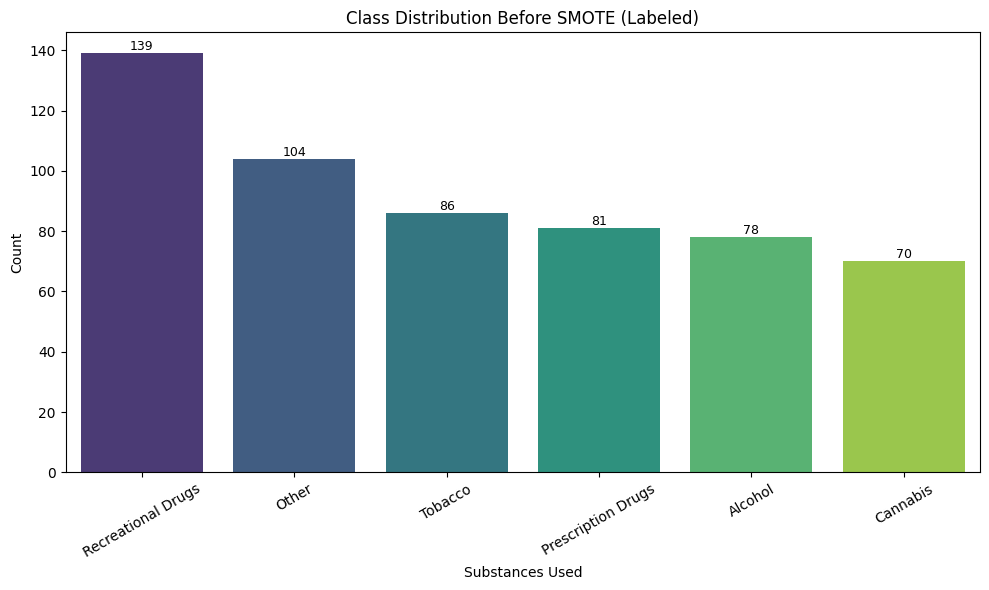

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('selected_features_dataset.csv')

# Define the mapping from encoded labels to readable class names
class_labels = {
    0: 'Other',
    1: 'Alcohol',
    2: 'Tobacco',
    3: 'Prescription Drugs',
    4: 'Cannabis',
    5: 'Recreational Drugs',
    6: 'None'
}

# Map encoded labels to class names
df['Substances_Used_Name'] = df['substances_used_label'].map(class_labels)

# Plot the class distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='Substances_Used_Name',
    data=df,
    palette='viridis',
    order=df['Substances_Used_Name'].value_counts().index
)

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.title('Class Distribution Before SMOTE (Labeled)')
plt.xlabel('Substances Used')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Applying SMOTE Sampling

<ipython-input-42-e4dd3f72e4a9>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-42-e4dd3f72e4a9>:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


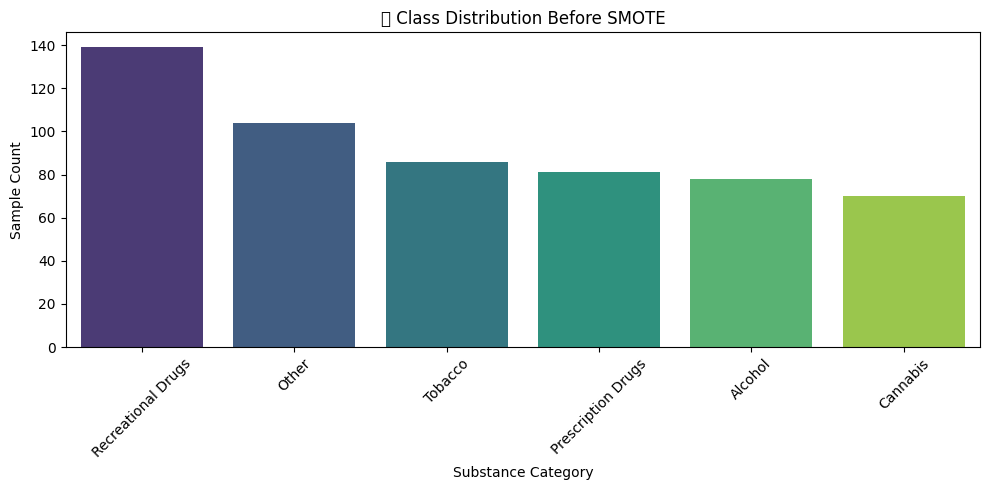

<ipython-input-42-e4dd3f72e4a9>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-42-e4dd3f72e4a9>:65: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


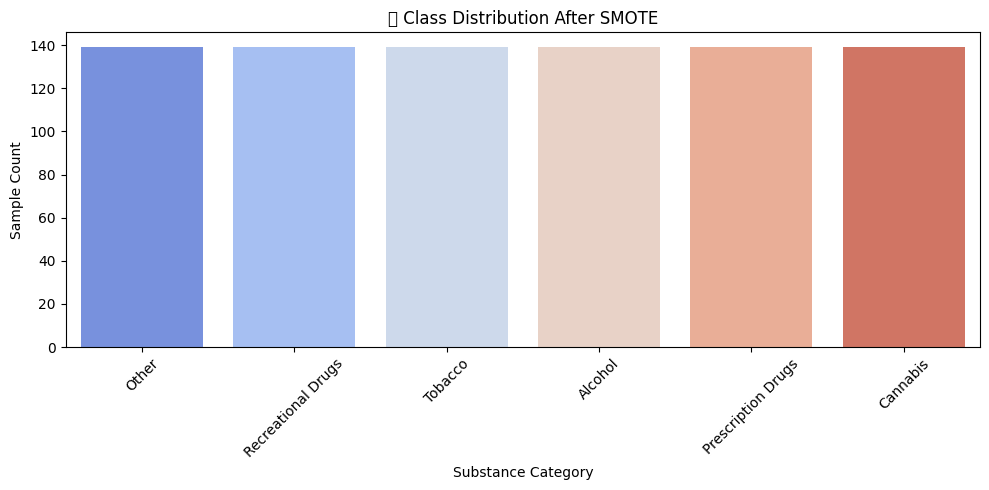

📁 Final balanced dataset saved as 'balanced_dataset.csv'


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# === Class labels dictionary ===
class_labels = {
    0: 'Other',
    1: 'Alcohol',
    2: 'Tobacco',
    3: 'Prescription Drugs',
    4: 'Cannabis',
    5: 'Recreational Drugs',
    6: 'None'
}

# === Step 1: Load dataset ===
df = pd.read_csv('selected_features_dataset.csv')

# === Step 2: Plot BEFORE balancing ===
df['Substance_Label'] = df['substances_used_label'].map(class_labels)

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='Substance_Label',
    order=df['Substance_Label'].value_counts().index,
    palette='viridis'
)
plt.title('📊 Class Distribution Before SMOTE')
plt.xlabel('Substance Category')
plt.ylabel('Sample Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Step 3: Drop class 6 (None) before oversampling ===
df = df[df['substances_used_label'] != 6]

# === Step 4: Separate features and target ===
X = df.drop(columns=['substances_used_label', 'Substance_Label'])
y = df['substances_used_label']

# === Step 5: Apply SMOTE ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# === Step 6: Create balanced DataFrame ===
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['substances_used_label'] = y_resampled
balanced_df['Substance_Label'] = balanced_df['substances_used_label'].map(class_labels)

# === Step 7: Plot AFTER balancing ===
plt.figure(figsize=(10, 5))
sns.countplot(
    data=balanced_df,
    x='Substance_Label',
    order=balanced_df['Substance_Label'].value_counts().index,
    palette='coolwarm'
)
plt.title('✅ Class Distribution After SMOTE')
plt.xlabel('Substance Category')
plt.ylabel('Sample Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Step 8: Save balanced dataset ===
balanced_df.drop(columns=['Substance_Label']).to_csv('balanced_dataset.csv', index=False)
print("📁 Final balanced dataset saved as 'balanced_dataset.csv'")


Check Balanced Dataset After Sampling

📊 Class Distribution (Encoded Labels):
substances_used_label
0    139
5    139
2    139
1    139
3    139
4    139
Name: count, dtype: int64


<ipython-input-43-ffdf1fe2d377>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-43-ffdf1fe2d377>:45: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


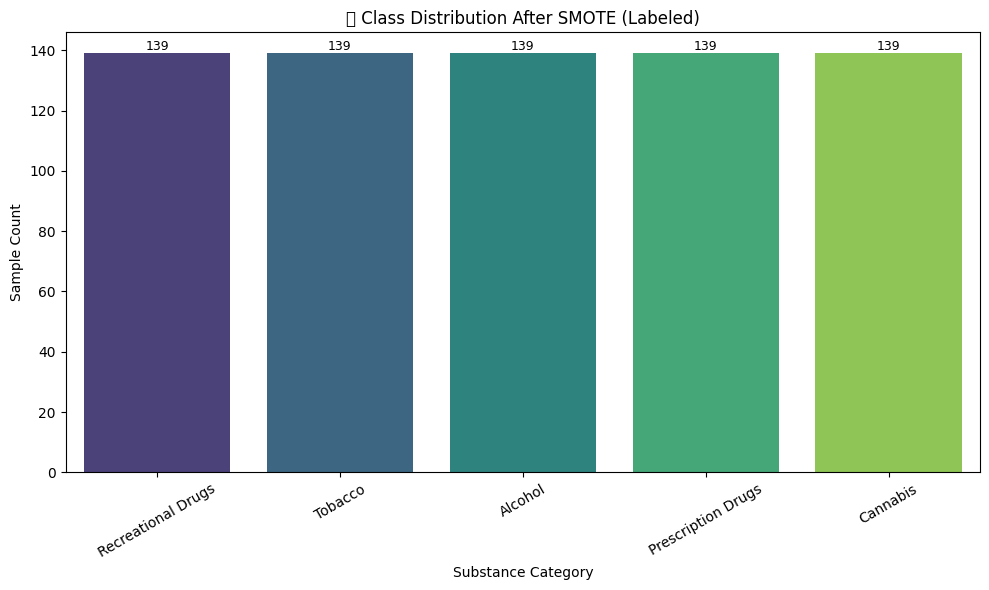

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Load the balanced dataset ===
df_balanced = pd.read_csv('balanced_dataset.csv')

# === Step 2: Verify and display class distribution ===
print("📊 Class Distribution (Encoded Labels):")
print(df_balanced['substances_used_label'].value_counts())

# === Step 3: Define label mapping (as per your specification) ===
class_labels = {
    1: 'Alcohol',
    2: 'Tobacco',
    3: 'Prescription Drugs',
    4: 'Cannabis',
    5: 'Recreational Drugs',
    6: 'None'
}

# === Step 4: Map class numbers to human-readable labels ===
df_balanced['Substances_Used_Label'] = df_balanced['substances_used_label'].map(class_labels)

# Optional: Drop rows with unmapped or missing values (e.g., class 0 if present)
df_balanced = df_balanced[df_balanced['Substances_Used_Label'].notna()]

# === Step 5: Plot the class distribution ===
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Substances_Used_Label',
    data=df_balanced,
    palette='viridis',
    order=df_balanced['Substances_Used_Label'].value_counts().index
)

# Add value labels
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.title('✅ Class Distribution After SMOTE (Labeled)')
plt.xlabel('Substance Category')
plt.ylabel('Sample Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Train Test Split

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the balanced dataset
df = pd.read_csv('balanced_dataset.csv')

# Separate features and target
X = df.drop(columns=['Substances_Used'])
y = df['Substances_Used']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully split into training and testing sets.")

Data successfully split into training and testing sets.


# Model Training and Selection


📊 Model Performance Metrics (in %):

                        Accuracy (%)  Precision (%)  Recall (%)  F1 Score (%)
Random Forest                  64.67          65.12       64.67         64.60
XGBoost                        59.88          60.24       59.88         59.88
Decision Tree                  55.09          55.76       55.09         54.89
K-Nearest Neighbors            52.69          53.84       52.69         53.10
Naive Bayes                    44.31          45.07       44.31         42.73
Logistic Regression            41.92          39.82       41.92         40.31
Support Vector Machine         35.33          46.01       35.33         32.45


<Figure size 1200x800 with 0 Axes>

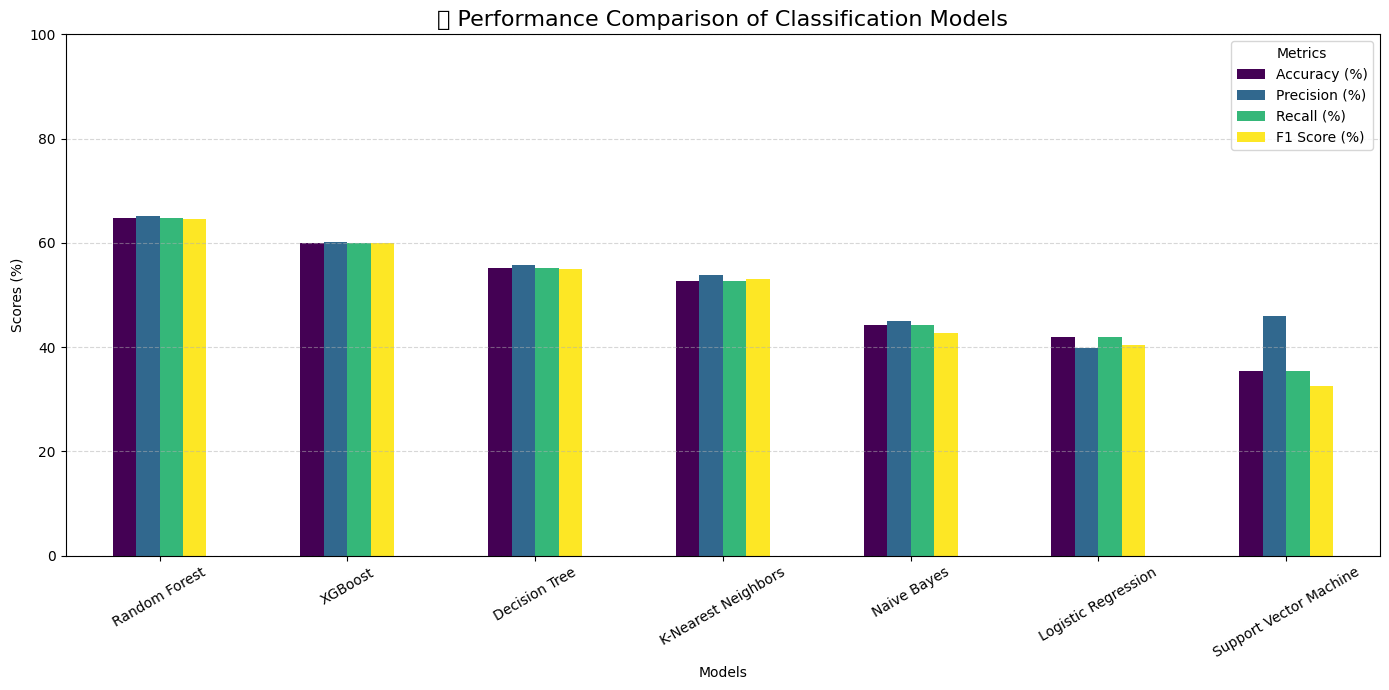

✅ Comprehensive model performance comparison completed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')  # Suppress convergence and deprecation warnings

# === Step 1: Load and Prepare Data === #
df = pd.read_csv('balanced_dataset.csv')

# Confirm target is in integer format and properly labeled
df['Substances_Used'] = df['Substances_Used'].astype(int)
X = df.drop(columns=['Substances_Used', 'substances_used_label'])
y = df['Substances_Used']

# Reset target labels to zero-indexed
label_offset = y.min()
y = y - label_offset

# === Step 2: Train/Test Split === #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Define Models === #
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=3000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# === Step 4: Train, Predict, and Evaluate === #
model_performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    model_performance[name] = {
        'Accuracy (%)': accuracy_score(y_test, y_pred) * 100,
        'Precision (%)': report['weighted avg']['precision'] * 100,
        'Recall (%)': report['weighted avg']['recall'] * 100,
        'F1 Score (%)': report['weighted avg']['f1-score'] * 100
    }

# === Step 5: Display Results === #
performance_df = pd.DataFrame(model_performance).T.sort_values(by='Accuracy (%)', ascending=False)
print("\n📊 Model Performance Metrics (in %):\n")
print(performance_df.round(2))

# === Step 6: Visualize All Metrics === #
plt.figure(figsize=(12, 8))
performance_df.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.title('📈 Performance Comparison of Classification Models', fontsize=16)
plt.ylabel('Scores (%)')
plt.xlabel('Models')
plt.xticks(rotation=30)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

print("✅ Comprehensive model performance comparison completed.")

### **Insights from Model Performance**

- **Random Forest** performed the best, achieving an **accuracy of 64.67%** and the highest **F1 Score of 64.60%**, indicating it handles the data better than other models.  
- **XGBoost** followed with an accuracy of **59.88%** and a relatively high F1 Score of **59.88%**, making it a strong contender for further optimization.  
- **K-Nearest Neighbors (KNN)** achieved a moderate accuracy of **52.69%** with a decent F1 Score of **53.10%**, suggesting it may work well with further tuning.  
- **Decision Tree** showed average performance (**55.09% accuracy**), indicating potential overfitting.  
- **Logistic Regression** and **Naive Bayes** struggled with accuracies of **41.92%** and **44.31%**, showing limitations in capturing complex relationships in the data.  
- **Support Vector Machine (SVM)** underperformed with an accuracy of **35.33%**, suggesting it may not be suitable without additional preprocessing or hyperparameter tuning.  



🔁 Cross-Validation Accuracy (5-Fold in %):

                        Cross-Validation Accuracy (%)
Random Forest                                   61.91
XGBoost                                         58.47
K-Nearest Neighbors                             50.66
Decision Tree                                   49.17
Naive Bayes                                     40.33
Logistic Regression                             38.38
Support Vector Machine                          35.09


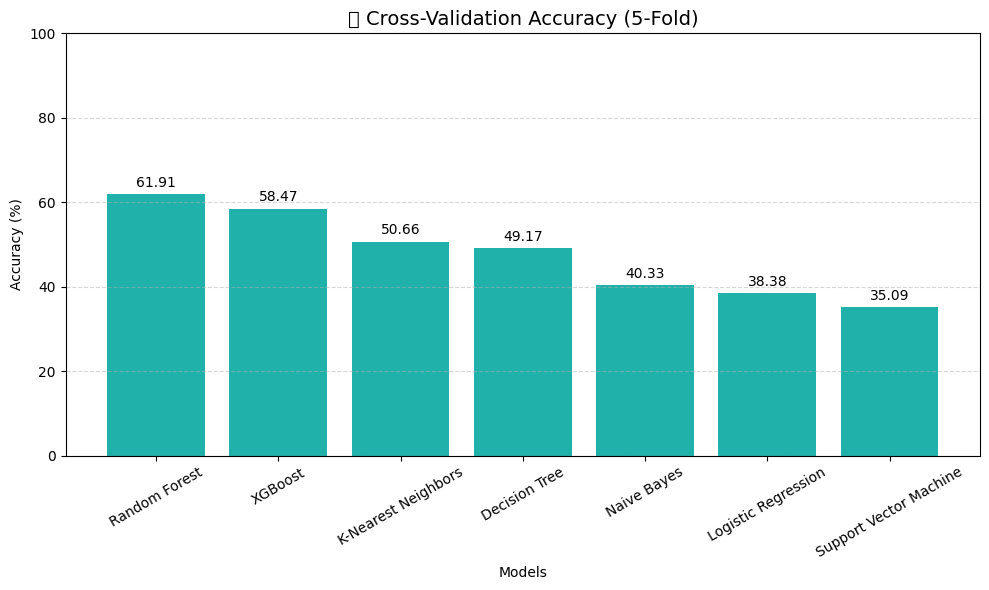

✅ Cross-validation evaluation completed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')  # Suppress convergence and deprecation warnings

# === Step 1: Load and Prepare Data === #
df = pd.read_csv('balanced_dataset.csv')

# Confirm target is in integer format and properly labeled
df['Substances_Used'] = df['Substances_Used'].astype(int)
X = df.drop(columns=['Substances_Used', 'substances_used_label'])
y = df['Substances_Used']

# Reset target labels to zero-indexed
label_offset = y.min()
y = y - label_offset

# === Step 2: Train/Test Split === #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Define Models === #
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=3000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# === Step 4: Evaluate Cross-Validation Only === #
cv_scores = {}
for name, model in models.items():
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean() * 100
    cv_scores[name] = cv_accuracy

# === Step 5: Display Cross-Validation Results === #
cv_df = pd.DataFrame.from_dict(cv_scores, orient='index', columns=['Cross-Validation Accuracy (%)'])
cv_df = cv_df.sort_values(by='Cross-Validation Accuracy (%)', ascending=False)
print("\n🔁 Cross-Validation Accuracy (5-Fold in %):\n")
print(cv_df.round(2))

# === Step 6: Visualize Cross-Validation Accuracy === #
plt.figure(figsize=(10, 6))
bars = plt.bar(cv_df.index, cv_df['Cross-Validation Accuracy (%)'], color='lightseagreen')
plt.title('🔁 Cross-Validation Accuracy (5-Fold)', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.xlabel('Models')
plt.ylim(0, 100)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

print("✅ Cross-validation evaluation completed.")


In [ ]:
import joblib

# === Step 4: Train, Predict, and Evaluate === #
model_performance = {}
best_rf_model = None  # Will hold our Random Forest model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if name == 'Random Forest':
        best_rf_model = model  # Save the Random Forest model instance

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    model_performance[name] = {
        'Accuracy (%)': accuracy_score(y_test, y_pred) * 100,
        'Precision (%)': report['weighted avg']['precision'] * 100,
        'Recall (%)': report['weighted avg']['recall'] * 100,
        'F1 Score (%)': report['weighted avg']['f1-score'] * 100
    }

# Saving & Loading the Model for further use

In [ ]:
# ✅ Save the Random Forest model
if best_rf_model:
    joblib.dump(best_rf_model, 'random_forest_model.pkl')
    print("✅ Random Forest model saved as 'random_forest_model.pkl'.")
else:
    print("⚠️ Random Forest model not found or not trained.")


✅ Random Forest model saved as 'random_forest_model.pkl'.


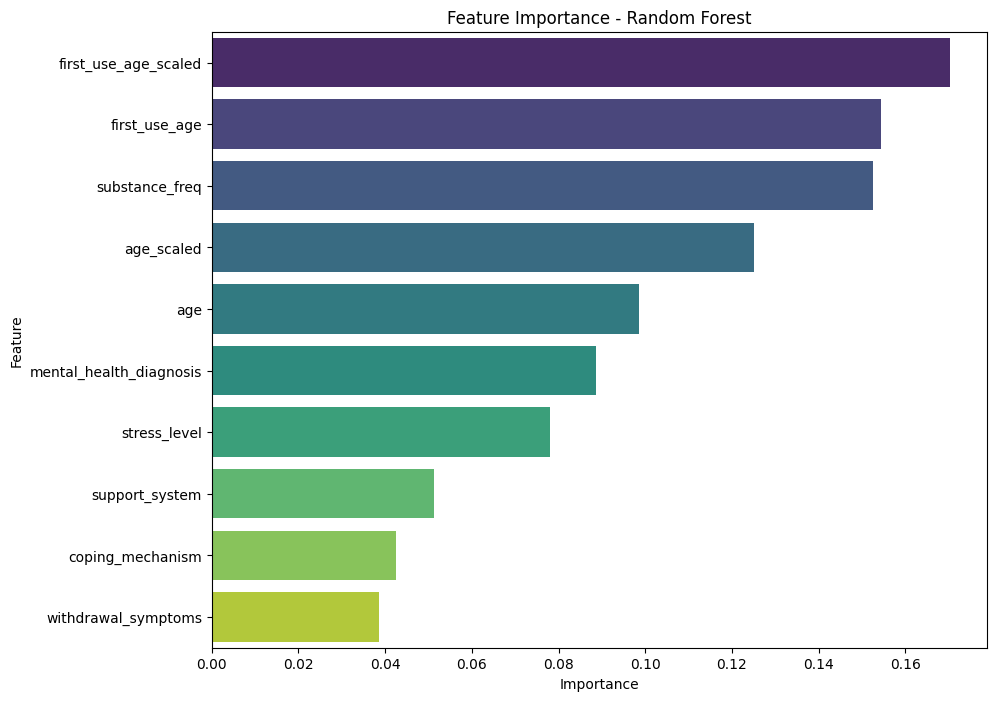

In [ ]:
# Plot feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.show()


Testing my Model on New Dataset

In [ ]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Read the Excel file
new_data = pd.read_excel(file_name)

print("File imported successfully!")
print(new_data.head())


Saving New.xlsx to New (1).xlsx
File imported successfully!
   substance_freq  first_use_age  first_use_age_scaled  age  age_scaled  \
0               4             16                  0.44   22        0.61   
1               2             14                  0.38   19        0.49   
2               5             18                  0.50   25        0.70   
3               3             17                  0.47   20        0.53   
4               1             13                  0.35   18        0.45   

   mental_health_diagnosis  stress_level  support_system  withdrawal_symptoms  \
0                        1             7               2                    1   
1                        0             5               3                    0   
2                        1             8               1                    1   
3                        0             6               2                    0   
4                        0             4               4                    0   

  

In [ ]:
# Remove extra columns if they exist
new_data = new_data.drop(columns=['name', 'risky_gambling', 'risky_video_gaming'], errors='ignore')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_first_use_age = MinMaxScaler()
scaler_age = MinMaxScaler()

# Fit and transform using MinMaxScaler
new_data['first_use_age_scaled'] = scaler_first_use_age.fit_transform(new_data[['first_use_age']])
new_data['age_scaled'] = scaler_age.fit_transform(new_data[['age']])


In [ ]:
new_data.to_excel('updated_new_data.xlsx', index=False)
print("Data saved as 'updated_new_data.xlsx'.")


Data saved as 'updated_new_data.xlsx'.


In [ ]:
import pandas as pd
import joblib

# === Step 1: Load the updated dataset === #
new_data = pd.read_excel('updated_new_data.xlsx')

# === Step 2: Load the saved Random Forest model === #
model = joblib.load('random_forest_model.pkl')

# === Step 3: Explicitly define the feature order used during training === #
expected_features = [
    'substance_freq', 'first_use_age', 'first_use_age_scaled',
    'age', 'age_scaled', 'mental_health_diagnosis', 'stress_level',
    'support_system', 'withdrawal_symptoms', 'coping_mechanism'
]

# === Step 4: Check and reorder columns === #
missing = [col for col in expected_features if col not in new_data.columns]
if missing:
    raise ValueError(f"❌ Missing required features in input data: {missing}")

# Reorder columns to exactly match training input order
new_data_ordered = new_data[expected_features]

# === Step 5: Convert to NumPy array to avoid feature name mismatch === #
X_input = new_data_ordered.to_numpy()

# === Step 6: Perform predictions === #
predictions = model.predict(X_input)

# === Step 7: Label predictions (binary) === #
addiction_predictions = ['Yes' if pred == 1 else 'No' for pred in predictions]

# === Step 8: Save results === #
new_data['Addiction_Predicted'] = addiction_predictions
new_data.to_excel('addiction_predictions.xlsx', index=False)

print("✅ Predictions successfully completed and saved to 'addiction_predictions.xlsx'.")


✅ Predictions successfully completed and saved to 'addiction_predictions.xlsx'.


In [ ]:
# Load and display the predictions
predicted_data = pd.read_excel('addiction_predictions.xlsx')
predicted_data.head(10)  # Display the first few rows


,substance_freq,first_use_age,first_use_age_scaled,age,age_scaled,mental_health_diagnosis,stress_level,support_system,withdrawal_symptoms,coping_mechanism,Addiction_Predicted
0,4,16,0.571429,22,0.5,1,7,2,1,3,No
1,2,14,0.285714,19,0.2,0,5,3,0,4,No
2,5,18,0.857143,25,0.8,1,8,1,1,2,No
3,3,17,0.714286,20,0.3,0,6,2,0,5,No
4,1,13,0.142857,18,0.1,0,4,4,0,4,No
5,4,15,0.428571,23,0.6,1,7,1,1,2,No
6,2,16,0.571429,21,0.4,0,5,3,0,3,No
7,5,19,1.000000,27,1.0,1,9,1,1,1,No
8,3,14,0.285714,20,0.3,0,6,2,0,5,No
9,1,12,0.000000,17,0.0,0,3,4,0,4,No


In [ ]:
import joblib

# Assuming best_rf is your final trained model
joblib.dump(best_rf, 'best_random_forest_model.pkl')
print("✅ Model saved successfully!")


✅ Model saved successfully!
